## Exercise 
use K means to cluster colors on the image found at the link below. Load the image directly from the link using code. This is an image of something called 'brainbow', where researchers created a genetically altered animal which expresses random colors in each neuron, leading to easily discernable brain cells.

http://cbs.fas.harvard.edu/usr/connectome/brainbow/brainbow2.1.jpg



(405, 600, 3)


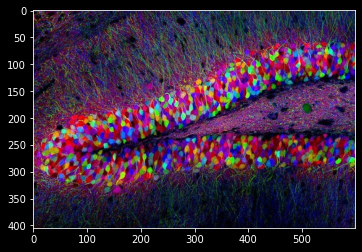

In [10]:
import os
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread("http://cbs.fas.harvard.edu/usr/connectome/brainbow/brainbow2.1.jpg", format='jpeg')

print(img.shape)
plt.style.use("dark_background")
plt.imshow(img)

In [9]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

img = img[:, :, :3]
X = img.reshape(-1, 3)

kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(img.shape)


def segment_image_by_color(image):
  X = image.reshape(-1, 3)
  seg_img_dict = {}
  for k in [2, 4, 6, 8, 10]:
    kmeans = MiniBatchKMeans(n_clusters=k).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    seg_img_dict[k] = segmented_img.reshape(img.shape)
  return seg_img_dict

image_dict = segment_image_by_color(img)

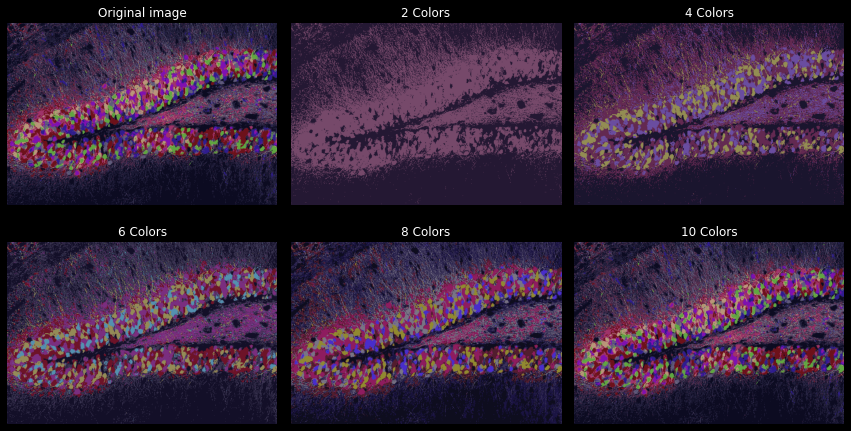

In [25]:
plt.figure(figsize=(15, 8))
plt.subplots_adjust(wspace=0.05, hspace=0.01)

plt.subplot(231)
plt.imshow(img.astype('uint8'))
plt.title("Original image")
plt.axis('off')

idx = 1
for k, img in image_dict.items():
  plt.subplot(231 + idx)
  idx += 1
  plt.imshow(image_dict[k].astype('uint8'))
  plt.title(f"{k} Colors")
  plt.axis('off')